In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ydata_profiling
import seaborn as sns
import datetime as date
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [67]:
a = os.path.join('dados','get_prouni.csv')
prouni = pd.read_csv(a)
prouni.head()

ano sigla_uf  id_municipio          cpf  sexo  raca_cor data_nascimento  \
0  2005       AM       1302603  ***417022**     1         4      1987-03-30   
1  2005       AM       1302603  ***241652**     2         4      1984-07-02   
2  2005       AM       1302603  ***411482**     2         4      1984-10-17   
3  2005       AM       1302603  ***320922**     2         2      1985-11-16   
4  2005       AM       1302603  ***470422**     1         4      1986-06-05   

   beneficiario_deficiente  id_ies  campus  nome_municipio_ies  \
0                        0     322     NaN                 NaN   
1                        0     322     NaN                 NaN   
2                        0     322     NaN                 NaN   
3                        0     322     NaN                 NaN   
4                        0     322     NaN                 NaN   

                 curso  turno_curso  tipo_bolsa  modalidade_ensino  
0             FARMACIA            1           1                  1  
1  ENGENHARIA ELETRICA            3           1                  1  
2  ENGENHARIA ELETRICA            3           2                  1  
3  ENGENHARIA ELETRICA            3           2                  1  
4        ADMINISTRACAO            3           2                  1

In [68]:
prouni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ano                      35000 non-null  int64  
 1   sigla_uf                 35000 non-null  object 
 2   id_municipio             35000 non-null  int64  
 3   cpf                      35000 non-null  object 
 4   sexo                     35000 non-null  int64  
 5   raca_cor                 35000 non-null  int64  
 6   data_nascimento          34999 non-null  object 
 7   beneficiario_deficiente  35000 non-null  int64  
 8   id_ies                   35000 non-null  int64  
 9   campus                   0 non-null      float64
 10  nome_municipio_ies       0 non-null      float64
 11  curso                    34424 non-null  object 
 12  turno_curso              35000 non-null  int64  
 13  tipo_bolsa               35000 non-null  int64  
 14  modalidade_ensino     

In [69]:
prouni = prouni.drop(['campus', 'nome_municipio_ies'], axis=1)

In [70]:
prouni.dropna(subset=['curso'], inplace=True)
prouni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34424 entries, 0 to 34999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ano                      34424 non-null  int64 
 1   sigla_uf                 34424 non-null  object
 2   id_municipio             34424 non-null  int64 
 3   cpf                      34424 non-null  object
 4   sexo                     34424 non-null  int64 
 5   raca_cor                 34424 non-null  int64 
 6   data_nascimento          34423 non-null  object
 7   beneficiario_deficiente  34424 non-null  int64 
 8   id_ies                   34424 non-null  int64 
 9   curso                    34424 non-null  object
 10  turno_curso              34424 non-null  int64 
 11  tipo_bolsa               34424 non-null  int64 
 12  modalidade_ensino        34424 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 3.7+ MB


In [71]:
def obtem_categoria(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numérico'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Data'
    elif unique_count==total_count:
        return 'Texto'
    else:
        return 'Categórico'

def print_categorias(df):
    for column_name in df.columns:
        print(column_name, ": ", obtem_categoria(df[column_name]))

In [72]:
prouni['data_nascimento'] = pd.to_datetime(prouni['data_nascimento'])

In [73]:
print_categorias(prouni)

ano :  Numérico
sigla_uf :  Categórico
id_municipio :  Numérico
cpf :  Categórico
sexo :  Numérico
raca_cor :  Numérico
data_nascimento :  Data
beneficiario_deficiente :  Numérico
id_ies :  Numérico
curso :  Categórico
turno_curso :  Numérico
tipo_bolsa :  Numérico
modalidade_ensino :  Numérico


/var/folders/9z/ch74qjn969vft037hvrv54vm0000gn/T/ipykernel_18179/574936465.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette='viridis')


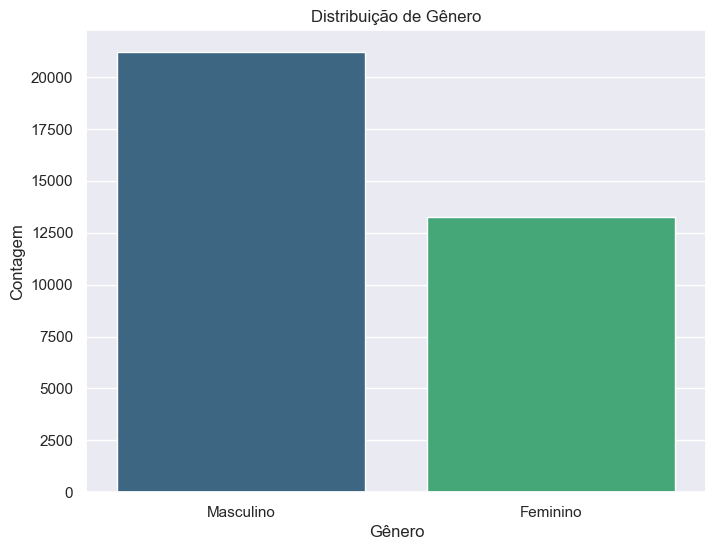

In [74]:
# Contar a distribuição de gênero
gender_distribution = prouni['sexo'].value_counts()

# Plotar a distribuição de gênero
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette='viridis')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Masculino', 'Feminino'])
plt.show()


/var/folders/9z/ch74qjn969vft037hvrv54vm0000gn/T/ipykernel_18179/2254588942.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_distribution.index, y=race_distribution.values, palette='viridis')


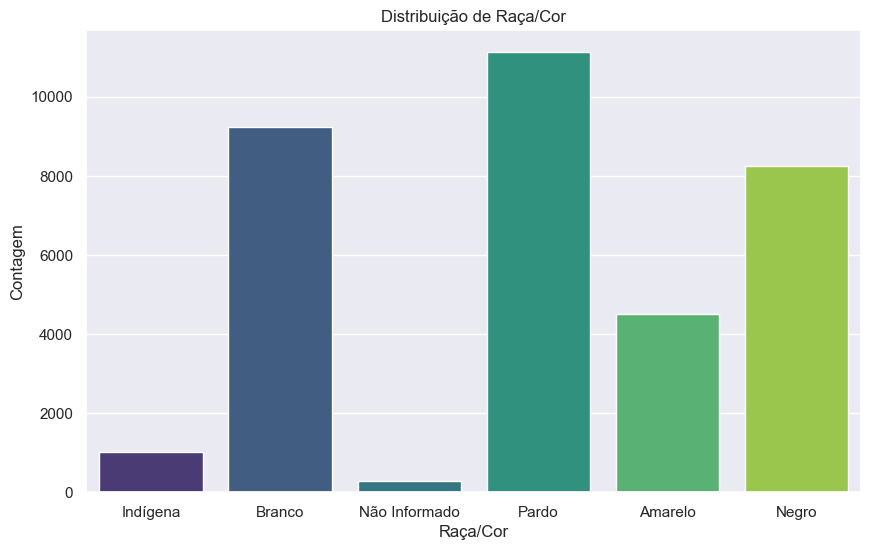

In [75]:
# Contar a distribuição de raça/cor
race_distribution = prouni['raca_cor'].value_counts()

# Plotar a distribuição de raça/cor
plt.figure(figsize=(10, 6))
sns.barplot(x=race_distribution.index, y=race_distribution.values, palette='viridis')
plt.title('Distribuição de Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Contagem')
plt.xticks(ticks=range(len(race_distribution.index)), labels=['Indígena', 'Branco', 'Não Informado', 'Pardo', 'Amarelo', 'Negro'])
plt.show()


/var/folders/9z/ch74qjn969vft037hvrv54vm0000gn/T/ipykernel_18179/4074729810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=course_distribution.index, x=course_distribution.values, palette='viridis')


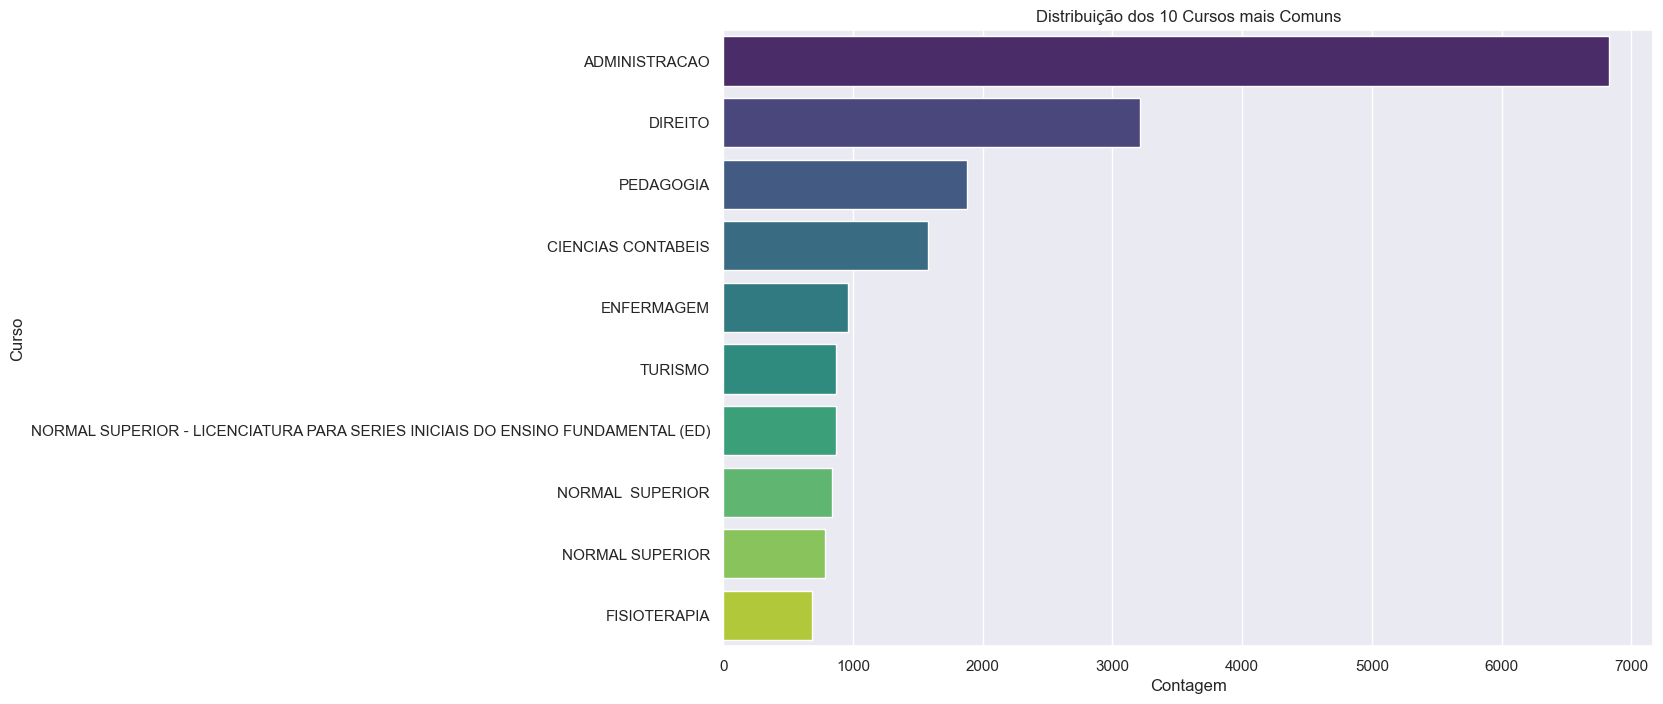

In [76]:
# Contar a distribuição dos cursos
course_distribution = prouni['curso'].value_counts().head(10)  # Os 10 cursos mais comuns

# Plotar a distribuição dos cursos
plt.figure(figsize=(12, 8))
sns.barplot(y=course_distribution.index, x=course_distribution.values, palette='viridis')
plt.title('Distribuição dos 10 Cursos mais Comuns')
plt.xlabel('Contagem')
plt.ylabel('Curso')
plt.show()


/var/folders/9z/ch74qjn969vft037hvrv54vm0000gn/T/ipykernel_18179/2895171291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scholarship_type_distribution.index, y=scholarship_type_distribution.values, palette='viridis')


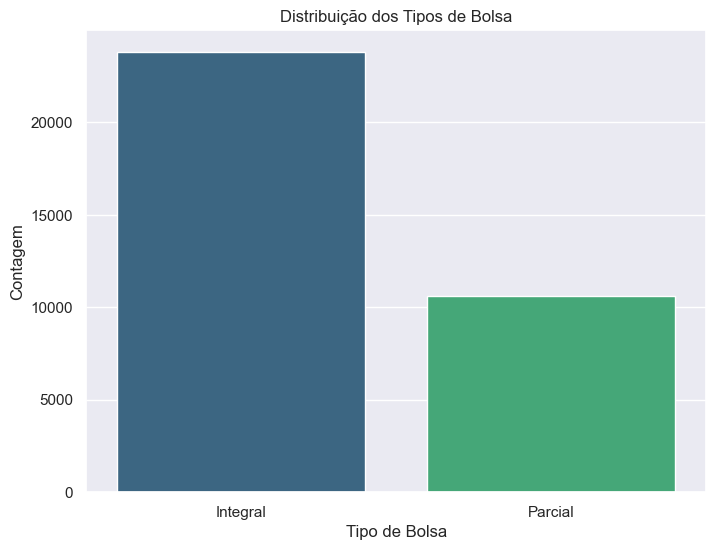

In [77]:
# Contar a distribuição dos tipos de bolsa
scholarship_type_distribution = prouni['tipo_bolsa'].value_counts()

# Plotar a distribuição dos tipos de bolsa
plt.figure(figsize=(8, 6))
sns.barplot(x=scholarship_type_distribution.index, y=scholarship_type_distribution.values, palette='viridis')
plt.title('Distribuição dos Tipos de Bolsa')
plt.xlabel('Tipo de Bolsa')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Integral', 'Parcial'])
plt.show()


/var/folders/9z/ch74qjn969vft037hvrv54vm0000gn/T/ipykernel_18179/363598428.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_mode_distribution.index, y=education_mode_distribution.values, palette='viridis')


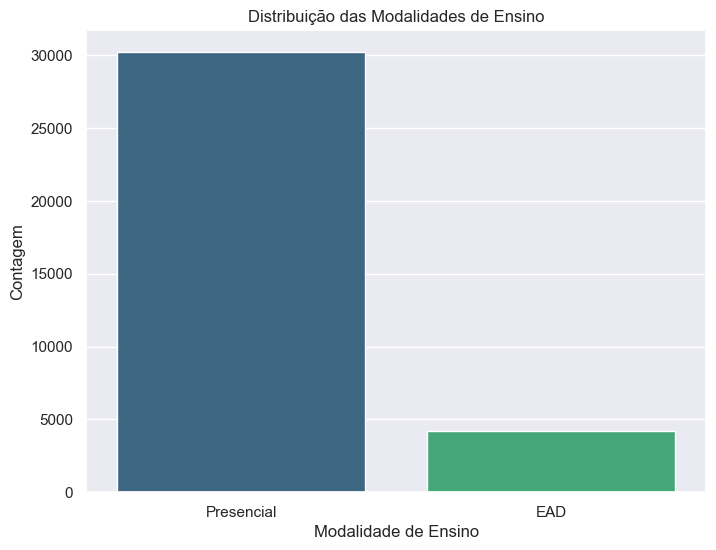

In [78]:
# Contar a distribuição das modalidades de ensino
education_mode_distribution = prouni['modalidade_ensino'].value_counts()

# Plotar a distribuição das modalidades de ensino
plt.figure(figsize=(8, 6))
sns.barplot(x=education_mode_distribution.index, y=education_mode_distribution.values, palette='viridis')
plt.title('Distribuição das Modalidades de Ensino')
plt.xlabel('Modalidade de Ensino')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Presencial', 'EAD'])
plt.show()


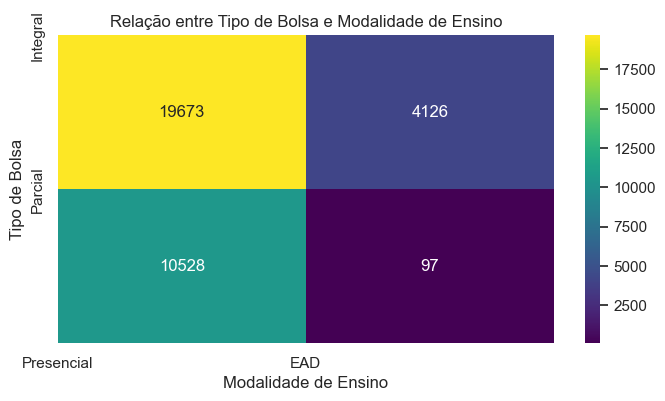

In [79]:
# Contar a relação entre tipo de bolsa e modalidade de ensino
scholarship_education_mode = pd.crosstab(prouni['tipo_bolsa'], prouni['modalidade_ensino'])

# Plotar a relação entre tipo de bolsa e modalidade de ensino
plt.figure(figsize=(8, 4))
sns.heatmap(scholarship_education_mode, annot=True, fmt='d', cmap='viridis')
plt.title('Relação entre Tipo de Bolsa e Modalidade de Ensino')
plt.xlabel('Modalidade de Ensino')
plt.ylabel('Tipo de Bolsa')
plt.xticks(ticks=[0, 1], labels=['Presencial', 'EAD'])
plt.yticks(ticks=[0, 1], labels=['Integral', 'Parcial'])
plt.show()


In [80]:
# contagem de beneficiários PCDs
contagem = prouni['beneficiario_deficiente'].sum()
contagem

np.int64(337)

In [81]:
# curso mais frequente dentre esta amostra (MODA)
# note que a função mode() não funciona apenas com ints mas também com os outros tipos primitivos
print(prouni["curso"].mode())

0    ADMINISTRACAO
Name: curso, dtype: object


Média de idade dentre os beneficiados

In [82]:
from datetime import date, datetime

# Converter a coluna 'data_nascimento' para datetime
prouni['data_nascimento'] = pd.to_datetime(prouni['data_nascimento'])

# Obter a data atual
data_atual = date(2005,12,30)

# Calcular a idade para cada linha
prouni['idade'] = prouni['data_nascimento'].apply(lambda x: data_atual.year - x.year - ((data_atual.month, data_atual.day) < (x.month, x.day)))

# Calcular a idade média
idade_media = prouni['idade'].mean()

print("Data atual:", data_atual)
print("Idade média:", idade_media)

Data atual: 2005-12-30
Idade média: 22.70054905150626


In [83]:
# Mediana
print(prouni['data_nascimento'].median())

1985-06-02 00:00:00


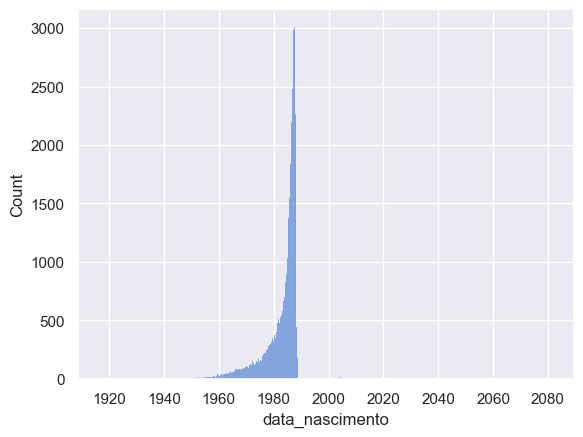

In [84]:
# Gráfico de beneficiários por ano
sns.histplot(prouni['data_nascimento'].dropna());

In [85]:
profile = ydata_profiling.ProfileReport(prouni)

In [98]:
profile.to_widgets()

In [87]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
# salva no diretório do notebook
profile.to_file("get_Prouni.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

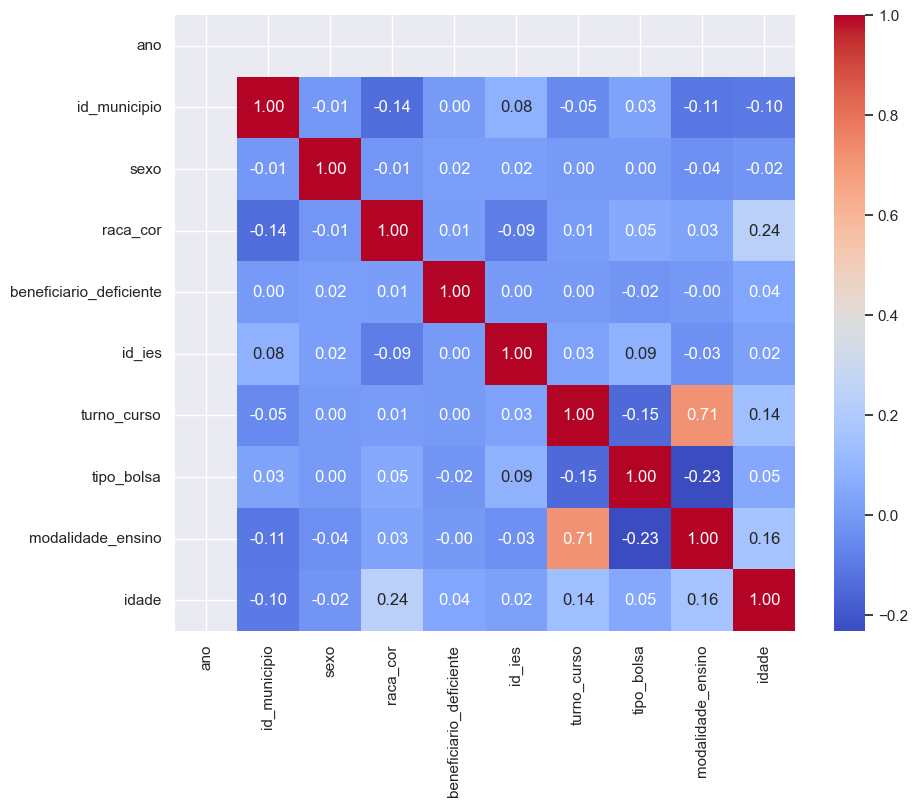

In [89]:
numericos = prouni.select_dtypes(include='number')

# Matriz correlaçao
correlation_matrix = numericos.corr()

# Heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [90]:
pd.get_dummies(prouni['raca_cor'])

1      2      3      4      5      6
0      False  False  False   True  False  False
1      False  False  False   True  False  False
2      False  False  False   True  False  False
3      False   True  False  False  False  False
4      False  False  False   True  False  False
...      ...    ...    ...    ...    ...    ...
34995  False  False  False  False  False   True
34996  False  False  False  False  False   True
34997  False  False  False   True  False  False
34998  False   True  False  False  False  False
34999  False   True  False  False  False  False

[34424 rows x 6 columns]

In [91]:
le = LabelEncoder()

en = OneHotEncoder()

# passar colunas para numeros pois o modelo vai trabalhar melhor
# talvez usar o curso como parametro mas terá que ver qual a acuracia do modelo com e sem ele
# targe: tipo_bolsa

lista = le.fit_transform(prouni['sigla_uf']).reshape(-1,1)
final = en.fit_transform(lista)
print(final)

  (np.int32(0), np.int32(2))	1.0
  (np.int32(1), np.int32(2))	1.0
  (np.int32(2), np.int32(2))	1.0
  (np.int32(3), np.int32(2))	1.0
  (np.int32(4), np.int32(2))	1.0
  (np.int32(5), np.int32(2))	1.0
  (np.int32(6), np.int32(2))	1.0
  (np.int32(7), np.int32(2))	1.0
  (np.int32(8), np.int32(2))	1.0
  (np.int32(9), np.int32(2))	1.0
  (np.int32(10), np.int32(2))	1.0
  (np.int32(11), np.int32(2))	1.0
  (np.int32(12), np.int32(2))	1.0
  (np.int32(13), np.int32(2))	1.0
  (np.int32(14), np.int32(2))	1.0
  (np.int32(15), np.int32(2))	1.0
  (np.int32(16), np.int32(2))	1.0
  (np.int32(17), np.int32(2))	1.0
  (np.int32(18), np.int32(2))	1.0
  (np.int32(19), np.int32(2))	1.0
  (np.int32(20), np.int32(2))	1.0
  (np.int32(21), np.int32(2))	1.0
  (np.int32(22), np.int32(2))	1.0
  (np.int32(23), np.int32(2))	1.0
  (np.int32(24), np.int32(2))	1.0
  :	:
  (np.int32(34399), np.int32(10))	1.0
  (np.int32(34400), np.int32(10))	1.0
  (np.int32(34401), np.int32(10))	1.0
  (np.int32(34402), np.int32(10))	1.0
  

In [92]:
le.classes_

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR'], dtype=object)

In [93]:
sigla_uf_encoded = le.fit_transform(prouni['sigla_uf']).reshape(-1,1)

print(sigla_uf_encoded)

[[ 2]
 [ 2]
 [ 2]
 ...
 [10]
 [10]
 [10]]


In [94]:
# Colunas features
feature_columns = ['raca_cor', 'turno_curso', 'modalidade_ensino', 'sigla_uf', 'curso']


le = LabelEncoder()
en = OneHotEncoder()

# Cria copia pois é o procedimento para usar o LabelEncoder
X = prouni[feature_columns].copy()

# Transformar as colunas
# X['sigla_uf_encoded'] = le.fit_transform(prouni['sigla_uf'])
# X['curso_encoded'] = le.fit_transform(prouni['curso'])

X = pd.get_dummies(X, columns=['raca_cor', 'sigla_uf', 'curso'])


# Target
y = prouni['tipo_bolsa']

# Split de dados para treinamento com seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Ajuste test_size e random_state conforme necessário

# Verifica o resultado
print(X_train.head())




       turno_curso  modalidade_ensino  raca_cor_1  raca_cor_2  raca_cor_3  \
15560            5                  2       False        True       False   
3206             3                  1       False       False       False   
21595            1                  1       False       False       False   
26928            4                  1       False        True       False   
25205            3                  1       False       False       False   

       raca_cor_4  raca_cor_5  raca_cor_6  sigla_uf_AC  sigla_uf_AL  ...  \
15560       False       False       False        False        False  ...   
3206         True       False       False        False        False  ...   
21595       False       False        True        False        False  ...   
26928       False       False       False        False        False  ...   
25205        True       False       False        False        False  ...   

       curso_SUPERIOR DE TECNOLOGIA EM TURISMO  curso_TELEMATICA  \
15560       

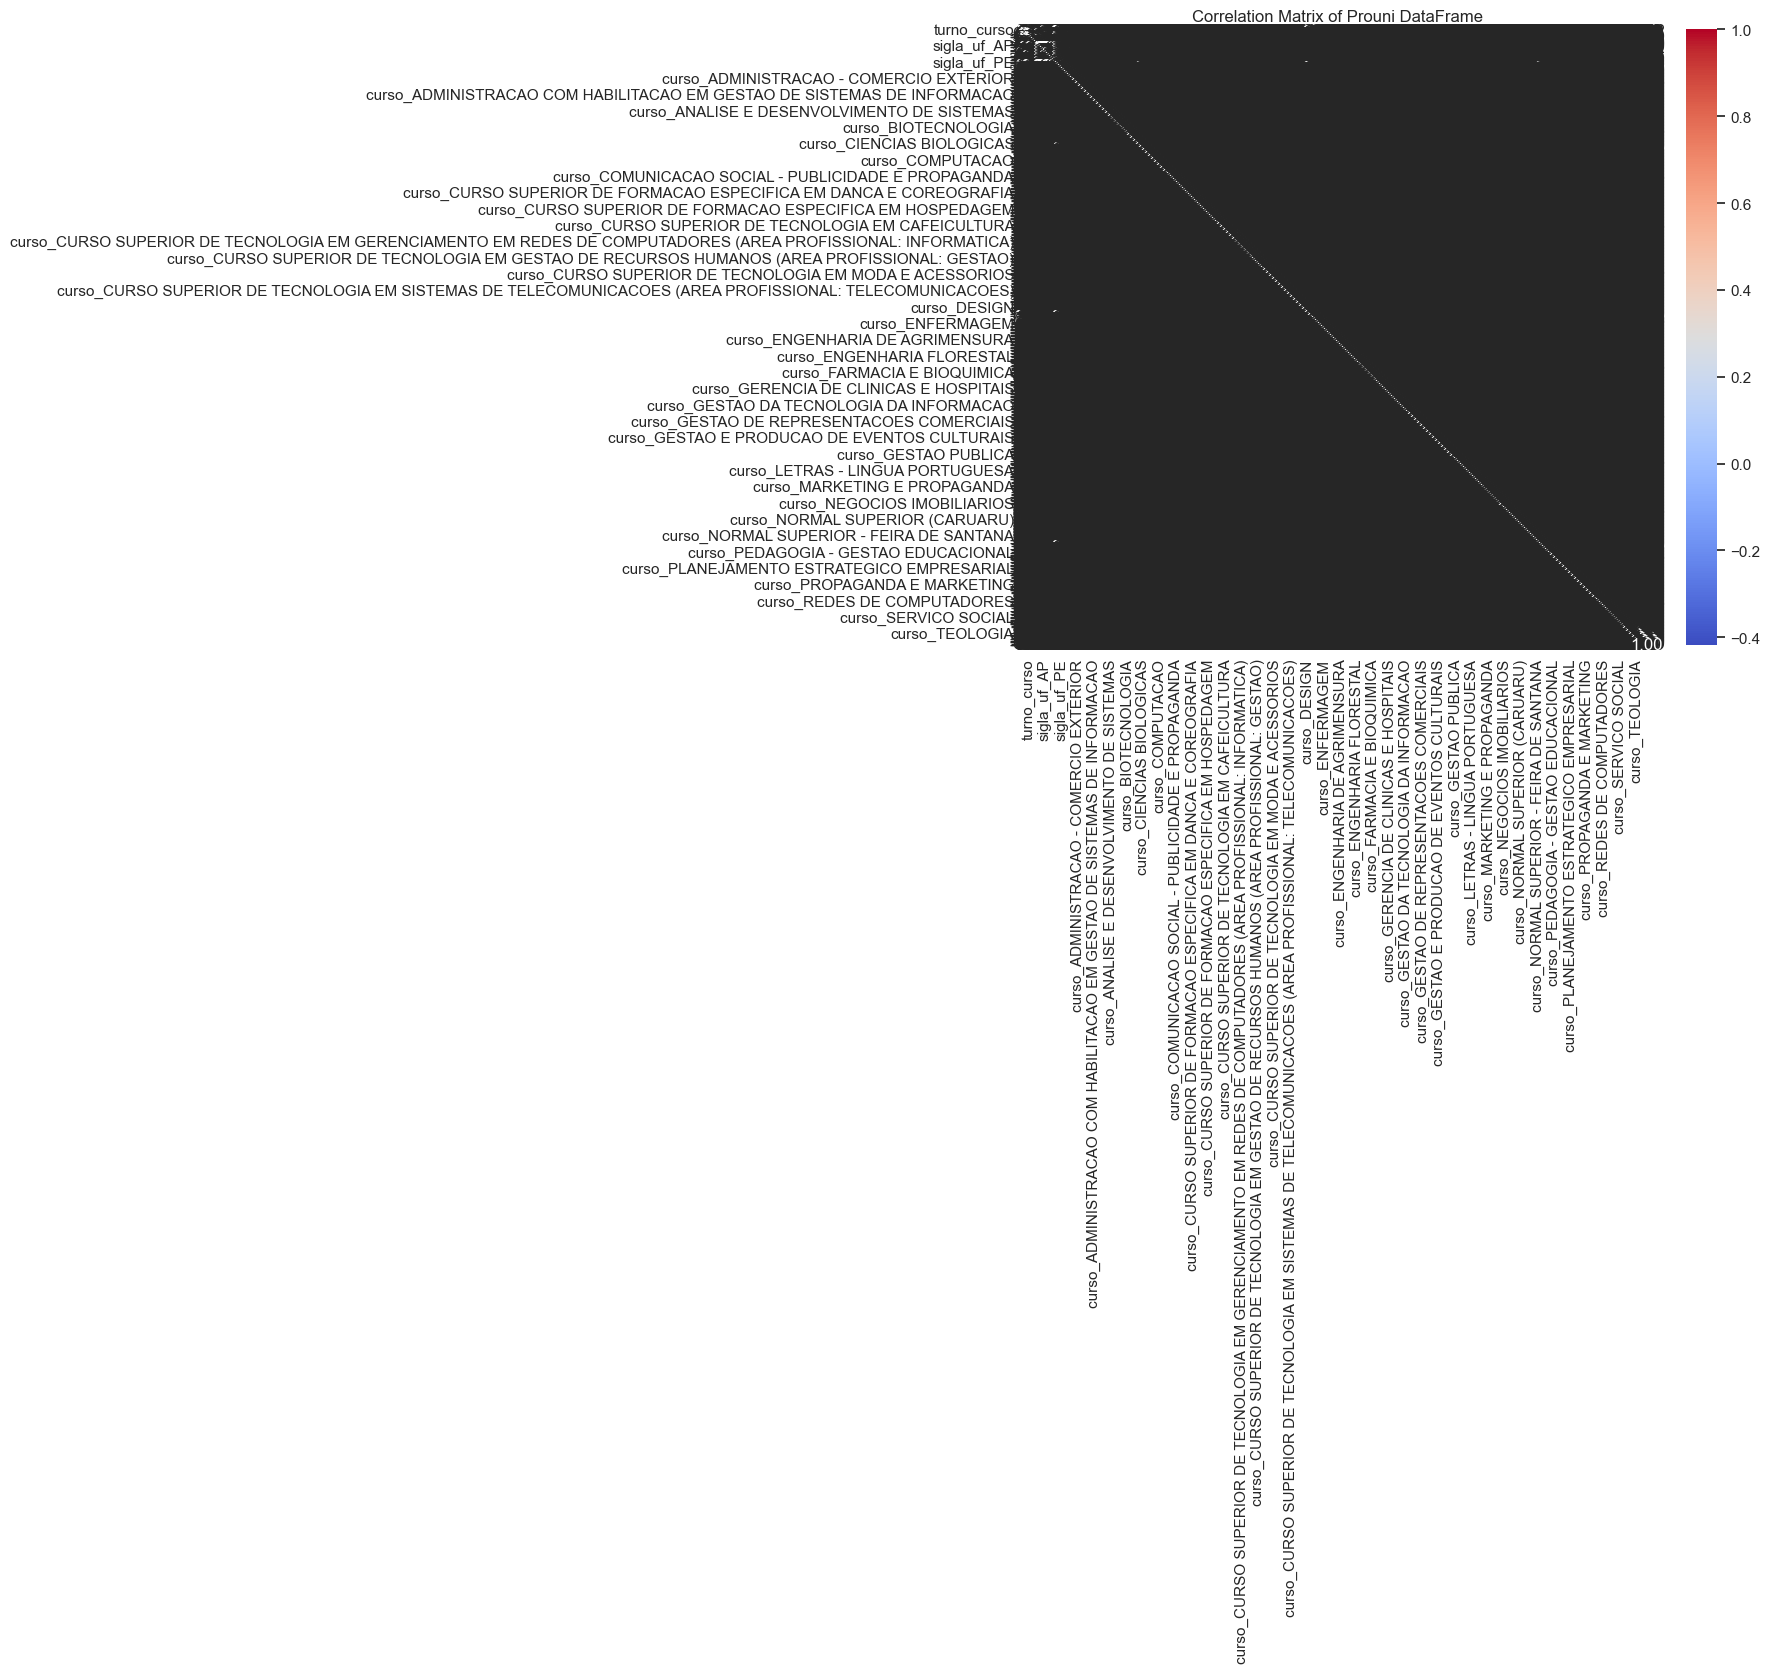

In [95]:
# Matriz de correlação
correlation_matrix = X.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Prouni DataFrame")
plt.show()

In [105]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Define pipeline models
pipelines = {
    "Random Forest": Pipeline([
        ('classifier', RandomForestClassifier())
    ]),
    "Gradient Boosting": Pipeline([
        ('classifier', GradientBoostingClassifier())
    ]),
    "Decision Tree": Pipeline([
        ('classifier', DecisionTreeClassifier())
    ]),
    "Logistic Regression": Pipeline([
        ('classifier', LogisticRegression(max_iter=10000))
    ]),
}

# Train and evaluate models
accuracy_results = {}

for name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")


Random Forest Accuracy: 0.7371096586782862
Gradient Boosting Accuracy: 0.7176470588235294
Decision Tree Accuracy: 0.7349310094408134
Logistic Regression Accuracy: 0.7096586782861293


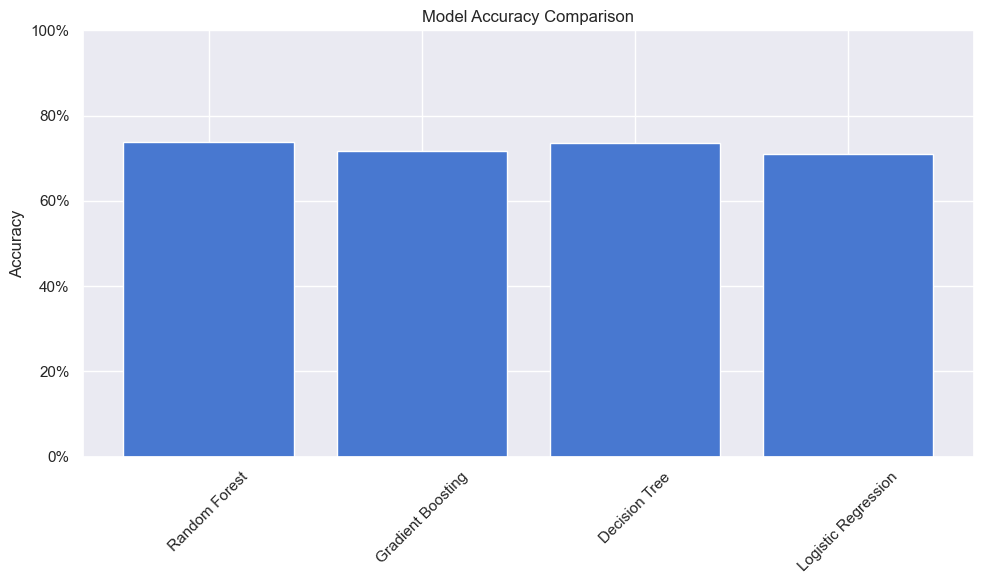

In [106]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

In [97]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7388525780682643
